In [1]:
%load_ext autoreload
%autoreload 2

from sklearn.cluster import KMeans
from fibonacci_numbers_python import n_fibonacci_numbers
import fibonacci_numbers


meson-python: building scikit-learn: /home/joshua/miniconda3/envs/sklearn-env/bin/ninja
[1/3] Compiling Cython source /home/joshua/Projects/HPC_Project/scikit-learn/sklearn/cluster/_k_means_lloyd.pyx
[2/3] Compiling C object sklearn/cluster/_k_means_lloyd.cpython-312-x86_64-linux-gnu.so.p/meson-generated_sklearn_cluster__k_means_lloyd.pyx.c.o
[3/3] Linking target sklearn/cluster/_k_means_lloyd.cpython-312-x86_64-linux-gnu.so


In [2]:
for i in range(0, 15 - 8, 8):
    print(i)

0


In [2]:
import numpy as np
import timeit
from sklearn.datasets import fetch_openml
import ctypes

In [ ]:
a = np.empty((70000, 28*28), dtype= np.float64)
b = np.ones((70000, 28*28), dtype= np.float64)
np.copyto(a, b)


11.4 μs ± 498 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [ ]:
# Allocate extra bytes to ensure we can align
buffer = np.empty(70000, dtype=np.float64)
# Find the starting index that is aligned to the required boundary
start_index = buffer.ctypes.data % 32 
start_index # gives out how many bytes are left to the next element 

if buffer.dtype == 'float64':
    start_index = start_index / 

# Create the aligned array view
aligned_arr = np.frombuffer(buffer[start_index:], dtype=buffer.dtype, count=-1).reshape(70000)

16

In [74]:
def aligned_array(shape, dtype=np.float32, alignment=32):
    # Calculate the byte size of the type
    dtype_size = np.dtype(dtype).itemsize
    
    # Calculate how many bytes need to be allocated based on the total number of elements in the array
    nbytes = np.prod(shape) * dtype_size
    
    # Allocate 32 extra bytes so when the array is not aligned that still the necessary size can be sliced later
    extra_bytes = alignment + nbytes
    
    # Create the buffer which holds n_elements * sizeof(dtype) + 32 bytes
    raw_buffer = np.empty(extra_bytes, dtype=np.uint8)
    print(raw_buffer.shape)
    
    # Find the start address that is 32-byte aligned
    start_index = -raw_buffer.ctypes.data % alignment
    
    # Here the slicing is simple as the start index just represents how many 
    aligned_array = np.frombuffer(raw_buffer[start_index:], dtype=dtype, count=np.prod(shape)).reshape(shape, order='C')
    
    # Verify alignment
    assert aligned_array.ctypes.data % alignment == 0, "Array is not aligned to 32 bytes!"
    assert aligned_array.flags['C_CONTIGUOUS'] == True, "Array is not C-Continguous"
    return aligned_array

In [75]:
al = aligned_array((70000, 784), np.float64)
al.flags

(439040032,)


  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False

In [53]:
np.dtype(np.float64).itemsize

8

In [5]:
import numpy as np
import timeit
from sklearn.datasets import fetch_openml
import ctypes

### Test a bit with Python and Cython

In [11]:
py_time = timeit.timeit('n_fibonacci_numbers(1000)', globals=globals(), number=20)
print(f"Python function average time over 10 runs: {py_time / 20} seconds")

# Measure the time taken by the Cython function
cy_time = timeit.timeit('fibonacci_numbers.n_fibonacci_numbers(1000)', globals=globals(), number=20)
print(f"Cython function average time over 10 runs: {cy_time / 20} seconds")
fibonacci_numbers.n_fibonacci_numbers(10)


Python function average time over 10 runs: 5.3143800050747815e-05 seconds
Cython function average time over 10 runs: 5.599960004474269e-05 seconds


[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]

In [12]:
X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])

In [13]:
mnist = fetch_openml(
name="mnist_784",
cache=True,
data_home="/home/joshua/Projects/HPC_Project/data",
as_frame=False,
    )

KeyboardInterrupt: 

In [ ]:
mnist.data[1] /255

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
l = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,67,232,39,0,0,0,0,0,0,0,0,0,62,81,0,0,0,0,0,0,0,0,0,0,0,0,0,0,120,180,39,0,0,0,0,0,0,0,0,0,126,163,0,0,0,0,0,0,0,0,0,0,0,0,0,2,153,210,40,0,0,0,0,0,0,0,0,0,220,163,0,0,0,0,0,0,0,0,0,0,0,0,0,27,254,162,0,0,0,0,0,0,0,0,0,0,222,163,0,0,0,0,0,0,0,0,0,0,0,0,0,183,254,125,0,0,0,0,0,0,0,0,0,46,245,163,0,0,0,0,0,0,0,0,0,0,0,0,0,198,254,56,0,0,0,0,0,0,0,0,0,120,254,163,0,0,0,0,0,0,0,0,0,0,0,0,23,231,254,29,0,0,0,0,0,0,0,0,0,159,254,120,0,0,0,0,0,0,0,0,0,0,0,0,163,254,216,16,0,0,0,0,0,0,0,0,0,159,254,67,0,0,0,0,0,0,0,0,0,14,86,178,248,254,91,0,0,0,0,0,0,0,0,0,0,159,254,85,0,0,0,47,49,116,144,150,241,243,234,179,241,252,40,0,0,0,0,0,0,0,0,0,0,150,253,237,207,207,207,253,254,250,240,198,143,91,28,5,233,250,0,0,0,0,0,0,0,0,0,0,0,0,119,177,177,177,177,177,98,56,0,0,0,0,0,102,254,220,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,169,254,137,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,169,254,57,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,169,254,57,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,169,255,94,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,169,254,96,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,169,254,153,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,169,255,153,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,96,254,153,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
len(l)

1567

In [ ]:
data =   [[1.2, 1.5, 1.8], [3.5, 3.6, 3.8], [1.3, 1.4, 1.9], [3.4, 3.5, 3.9], [10.2, 10.1, 10.4], [10.5, 10.6, 10.9]]
kmeans = KMeans(3, tol=1e-9, init = 'random', n_init = 1, random_state = 41, use_assign_centroids_gemm=True, verbose = True)
kmeans.fit(data)
kmeans.labels_

Initialization complete
Using Assign_centroids_gemm Implementation
Iteration 0, inertia 0.6500000000000004.
Using Assign_centroids_gemm Implementation
Iteration 1, inertia 0.32500000000000023.
Converged at iteration 1: strict convergence.


array([1, 0, 1, 0, 2, 2], dtype=int32)

In [ ]:
2/200

0.01

In [8]:
import logging
import argparse
import pathlib
import numpy as np
import pandas as pd
import itertools
import seaborn as sns
from matplotlib import pyplot as plt

Processing Data File: /home/joshua/Projects/HPC_Project/scikit-learn/src/out/sklearn_timings.txt
Index(['OMP_NUM_THREADS', 'FIT_TIME', 'NUM_ITERATIONS', 'ITERATIONS_SECOND',
       'CHUNK_SIZE', 'parameters'],
      dtype='object')
Processing Data File: /home/joshua/Projects/HPC_Project/scikit-learn/src/out/sklearn_assign_centroids_timings.txt
Index(['OMP_NUM_THREADS', 'FIT_TIME', 'NUM_ITERATIONS', 'ITERATIONS_SECOND',
       'CHUNK_SIZE', 'parameters'],
      dtype='object')


/tmp/ipykernel_22402/13351403.py:65: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  ax1.plot(


Directory /home/joshua/Projects/HPC_Project/scikit-learn/src/Visualization already exists.


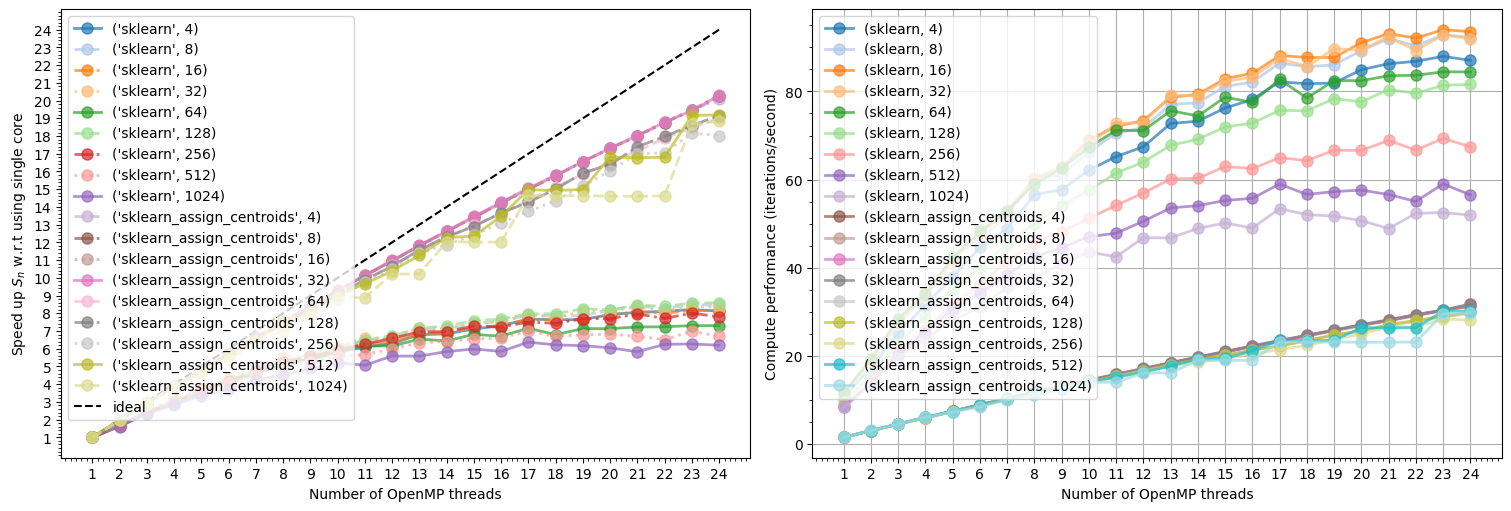

In [3]:
def combine_results(data_directories: list) -> list[pd.DataFrame]:

    dfs = []
    
    for directory in data_directories:
        
        directory = pathlib.Path(directory)
        assert directory.is_dir(), f"{directory} does not exist"
        assert any(directory.iterdir()), f"{directory} is empty"
        
        for file in directory.glob("*timings.txt"):
            print(f"Processing Data File: {file}")
            df = pd.read_csv(file, sep = "\t").assign(parameters = lambda df_: [str(file.stem).replace("_timings", "")] * df_.shape[0])
            print(df.columns)
            dfs.append(df)
            
    return pd.concat(dfs, axis = "rows")


df = combine_results(["/home/joshua/Projects/HPC_Project/scikit-learn/src/out"])
output_directory = "/home/joshua/Projects/HPC_Project/scikit-learn/src/Visualization"

color_map = plt.get_cmap("tab20")  # "tab20" provides 20 distinct colors
line_styles = ['-', '--', '-.', ':']  # Define multiple line styles

#     color_mapping = {
#     'g++_O3_arch_opt': '#FF0000',  # Red
#     'g++_O3_no_archopt': '#0000FF',  # Blue
#     'icx_O3_arch_opt': '#FFD700',  # Gold
#     'icx_O3_no_archopt': '#008000',  # Green
#     'g++_O3_arch_opt_SIMD_512': '#00FFFF',  # Cyan
#     'icx_O3_arch_opt_SIMD_512': '#FF00FF',  # Magenta
#     'g++_O3_arch_opt_SIMD_512_NUMA': '#FFA500',  # Orange
#     'icx_O3_arch_opt_SIMD_512_NUMA': '#800080',  # Purple
#     'pybind': '#008080',  # Dark Teal
#     'sklearn': '#808080'   # Grey
# }

# Create the pivot table for Speed up compared to single core performance
piv_table = df.pivot_table(
    index = "OMP_NUM_THREADS", 
    values = "FIT_TIME", 
    columns = ["parameters", "CHUNK_SIZE"], 
    aggfunc="mean"
)

# T_n=1 / T_n
piv_table = piv_table.div(piv_table.iloc[0], axis = "columns").pow(-1)
#ideal line

y_values = np.arange(1, piv_table.index[-1] + 1, 1)

cmap = plt.get_cmap("tab20")

# create plots
fig, (ax1, ax2) = plt.subplots(
    1, 2, 
    sharex=True, 
    layout="constrained", 
    figsize=(15, 5)
)


for i, (column, style) in enumerate(zip(piv_table.columns, itertools.cycle(line_styles))):
    ax1.plot(
        piv_table.index, 
        piv_table[column],
        label=column,
        marker="o",
        linestyle=style,
        linewidth=2,
        markersize=8,
        color=color_map(i),  # Assign color from the color map
        alpha=0.7
    )

ax1.plot(
    y_values, 
    y_values, 
    color='black', 
    linestyle='--', 
    label='ideal', 
    zorder=1
)

ax1.set_xlabel("Number of OpenMP threads")
ax1.set_ylabel("Speed up $S_n$ w.r.t using single core")
ax1.minorticks_on()
ax1.set_xticks(y_values)
ax1.set_yticks(y_values)
ax1.legend()

# calculate Compute performance (iterations/second)
df_iterations = df.assign(iterations_second = lambda df_: df_["NUM_ITERATIONS"] / (df_["FIT_TIME"] / 1000))

piv_table_iterations = df_iterations.pivot_table(
    index = "OMP_NUM_THREADS", 
    values = "iterations_second", 
    columns = ["parameters", "CHUNK_SIZE"], 
    aggfunc = "mean"
)

piv_table_iterations.plot(
    kind = "line", 
    marker = "o", 
    grid = True,
    alpha=0.7,
    linewidth=2,
    markersize=8,
    ax = ax2,
    colormap = cmap
    #color = [color_mapping[label] for label in piv_table_iterations.columns]
)

ax2.set_xlabel("Number of OpenMP threads")
ax2.set_ylabel("Compute performance (iterations/second)")
ax2.minorticks_on()
ax2.set_xticks(y_values)
ax2.legend()

if output_directory is not None:
    output_directory = pathlib.Path(output_directory)
    if not output_directory.exists():
    # Create the directory (and any necessary parent directories)
        output_directory.mkdir(parents=True, exist_ok=True)
        print(f"Directory {output_directory} created.")
    else:
        print(f"Directory {output_directory} already exists.")
        
    save_file = output_directory / "KMeans_Performance.png"
    fig.savefig(save_file, bbox_inches="tight")
else:
    plt.show()

In [ ]:
def compare_timings(file1 : str, file2: str):


    impl1 = pd.read_csv(file1, delimiter='\t')
    impl2 = pd.read_csv(file2, delimiter='\t')
    
    impl1_name = file1.split('/')[-1].replace('_timings.txt', "")
    impl2_name = file2.split('/')[-1].replace('_timings.txt', "")


    # Group by OMP_NUM_THREADS and CHUNK_SIZE, then calculate the average ITERATIONS_SECOND
    impl1_avg = impl1.groupby(['OMP_NUM_THREADS', 'CHUNK_SIZE'])['ITERATIONS_SECOND'].mean().reset_index()
    impl2_avg = impl2.groupby(['OMP_NUM_THREADS', 'CHUNK_SIZE'])['ITERATIONS_SECOND'].mean().reset_index()
    
    # impl1_avg_max = impl1_avg['ITERATIONS_SECOND'].idxmax()
    # impl2_avg_max = impl2_avg['ITERATIONS_SECOND'].idxmax()
    
    # print(f"Impl 1: Threads {impl1_avg.iloc[impl1_avg_max]}")
    # print(f"Impl 2: Threads {impl2_avg.iloc[impl2_avg_max]}")

    # Rename columns to distinguish between the two implementations
    impl1_avg = impl1_avg.rename(columns={'ITERATIONS_SECOND': 'ITERATIONS_SECOND_IMPL1'})
    impl2_avg = impl2_avg.rename(columns={'ITERATIONS_SECOND': 'ITERATIONS_SECOND_IMPL2'})

    # Merge the averages on OMP_NUM_THREADS and CHUNK_SIZE
    comparison = pd.merge(impl1_avg, impl2_avg, on=['OMP_NUM_THREADS', 'CHUNK_SIZE'])

    # Calculate the difference in ITERATIONS_SECOND between the two implementations
    comparison['ITERATIONS_SECOND_DIFF'] = comparison['ITERATIONS_SECOND_IMPL2'] - comparison['ITERATIONS_SECOND_IMPL1']
    
    heatmap_data = comparison.pivot(index='OMP_NUM_THREADS', columns='CHUNK_SIZE', values='ITERATIONS_SECOND_DIFF')

    # Plotting the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': f"ITERATIONS_SECOND Difference ({impl2_name} - {impl1_name})"})
    plt.title(f"Difference in Performance (Iterations/Second) between {impl1_name} and {impl2_name}")
    plt.xlabel('Chunk Size')
    plt.ylabel('Number of Threads')
    plt.show()


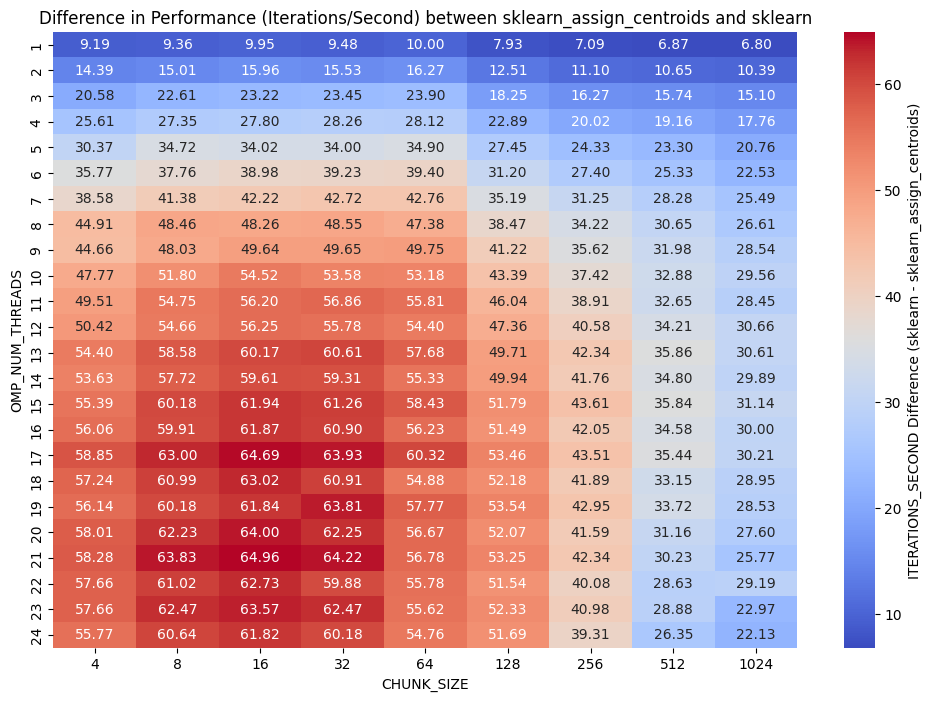

In [45]:
compare_timings('/home/joshua/Projects/HPC_Project/scikit-learn/src/out/sklearn_assign_centroids_timings.txt', '/home/joshua/Projects/HPC_Project/scikit-learn/src/out/sklearn_timings.txt')

In [39]:
a

,OMP_NUM_THREADS,CHUNK_SIZE,ITERATIONS_SECOND_IMPL1
0,1,4,1.557072
1,1,8,1.562185
2,1,16,1.562884
3,1,32,1.564319
4,1,64,1.560313
...,...,...,...
211,24,64,29.663193
212,24,128,29.907514
213,24,256,28.156186
214,24,512,30.193833
